# Introduction to SVM

SVM is a powerful classifier that works both on linearly and non linear seperable data.finds an optimum hyperplane, that best seperates our data so that the distance from nearest points in space to itself(also called margin) is maximized.These nearest points are called support vectors.  

# Drawback of Logistic Regression

it was not able to do well on non linear seperable data bcause decision boundary was non linear.

for non linearly seperable case, it uses something called kernel trick which we will go through in next part.

# what does Hyperplane means??

A hyperplane is a plane of n-1 dimensions in n dimensional feature space , that seperates two feature classes . for a 2d feature space, it would be a line and for a 3d feature space, it would be a plane and so on. 

A hyperplane is able to seperate classes if for all points-
wx+b>0(for data points in class 1)
wx+b <0 (for data points in class 0)

# Maximum Margin Hyperplane

An optimal Hyperplane best seperates our data so that the distance/ margin from the nearest points (Called support vectors) in space to itself is maximised.

# Lets Code Now !!

In [4]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [5]:
X,Y=make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,n_informative=2,n_redundant=0,n_features=2,random_state=3)

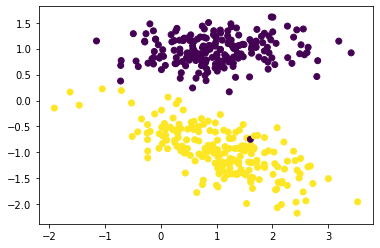

In [6]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [7]:
class SVM:
    def __init__(self,c=1.0):
        self.c=c
        self.w=0
        self.b=0
    def hinge_loss(self,w,b,X,Y):
        loss=0.0
        loss+=0.5*np.dot(w,w.T)
        m=X.shape[0]
        for i in range(m):
            ti=Y[i]*(np.dot(w,X[i].T)+b)
            loss+=self.c*max(0,(1-ti))
        return loss[0][0]
    def fit(self,X,Y,learning_rate=0.001,batch_size=100,max_itr=300):
        n_features=X.shape[1]
        n_samples=X.shape[0]
        n=learning_rate
        c=self.c
        # init the model parameters
        w=np.zeros((1,n_features))
        b=0
        losses=[]
        count=0
        for i in range(max_itr):
            l=self.hinge_loss(w,b,X,Y)
            #print(l)
            count+=1
            losses.append(l)
            ids=np.arange(n_samples)
            np.random.shuffle(ids)
            for batch_start in range(0,n_samples,batch_size):
                # assume 0 gradient for the batch
                gradb=0
                gradw=0
                for j in range(batch_start,batch_start+batch_size):
                  #  l=self.hinge_loss(w,b,X,Y)
                  #  losses.append(l)
                    val=ids[j]
                    if j<n_samples:
                        ti=Y[val]*(np.dot(w,X[val].T)+b)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=self.c*Y[val]*X[val]
                            gradb+=self.c*Y[val]
                # gradient for the batch is ready , update w and b
                w=w-n*w+n*gradw
                b=b+n*gradb
            self.w=w
            self.b=b
        return (w,b,losses,count)

In [8]:
mysvm=SVM()

In [9]:
# convert our Y labels into {1,-1}  , this is again an application of broadasting
Y[Y==0]=-1

In [10]:
# what we will do is, we will first iterate over first batch, compute gradient and losses, then iterate over 
# second batch, compute gradient and update weights and biases. and so on

In [11]:
W,b,losses,count=mysvm.fit(X,Y,learning_rate=0.001,batch_size=100,max_itr=150)

In [12]:
print(losses[0])
print(losses[-1])

400.0
14.687145096837728


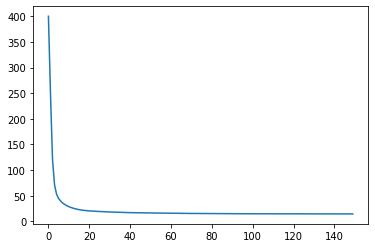

In [13]:
plt.plot(losses)
plt.show()

In [14]:
print(W)

[[-0.33774048 -2.06915344]]


In [15]:
print(b)

0.40800000000000025


In [16]:
def plotHyperPlane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1=np.linspace(-2,4,10)
    x2=-(w1*x1+b)/w2
    plt.plot(x1,x2)
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

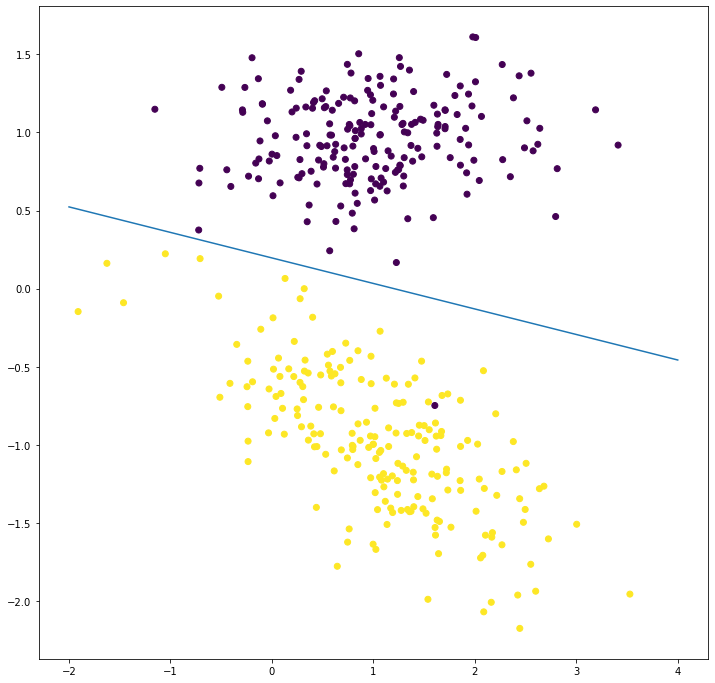

In [17]:
plotHyperPlane(W[0][0],W[0][1],b)

# Visualising Support Vectors, Positive and negtive Hyperplanes

# Effect Of changing C- Penality Constant

In [18]:
def plotHyperPlane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1=np.linspace(-2,4,10)
    x2=-(w1*x1+b)/w2
    x_p=-(w1*x1+b+1)/w2
    x_n=-(w1*x1+b-1)/w2
    plt.plot(x1,x2,label="Hyperplane")
    plt.plot(x1,x_p,label="Positive Hyperplane")
    plt.plot(x1,x_n,label="Negative Hyperplane")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()

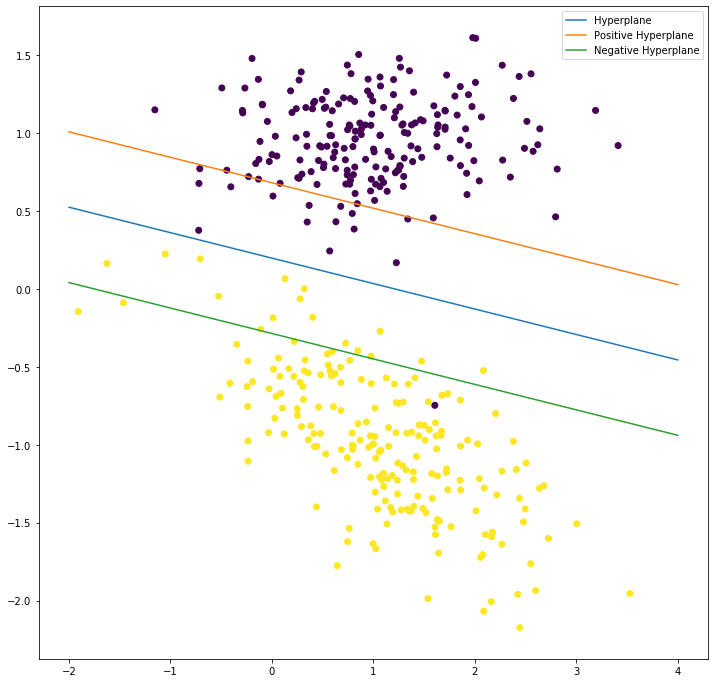

In [19]:
plotHyperPlane(W[0][0],W[0][1],b)

400000.0
13606.117762982287


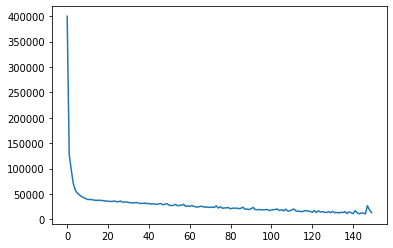

[[ -3.29519725 -20.70480933]]
4.0


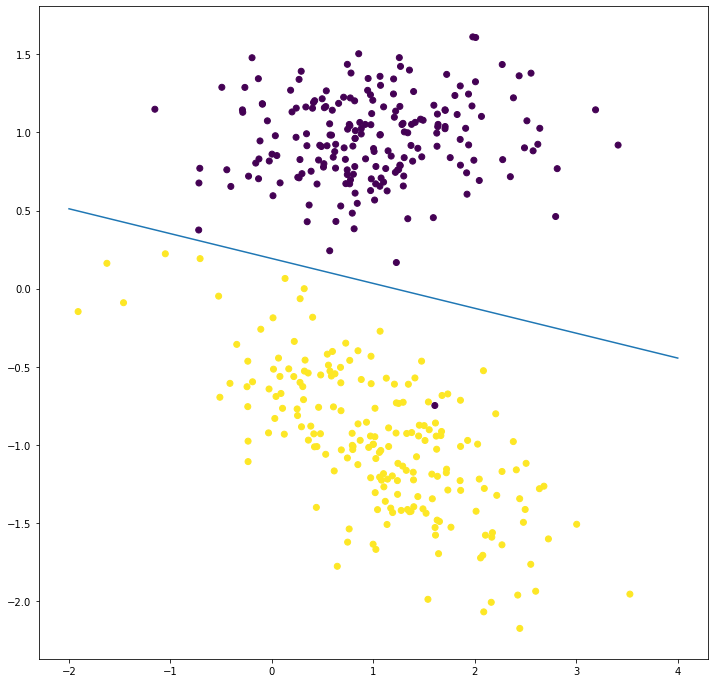

In [20]:
mysvm=SVM(c=1000)
W,b,losses,count=mysvm.fit(X,Y,learning_rate=0.001,batch_size=100,max_itr=150)
print(losses[0])
print(losses[-1])
plt.plot(losses)
plt.show()
print(W)
print(b)
def plotHyperPlane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1=np.linspace(-2,4,10)
    x2=-(w1*x1+b)/w2
    plt.plot(x1,x2)
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()
plotHyperPlane(W[0][0],W[0][1],b)

In [21]:
def plotHyperPlane(w1,w2,b):
    plt.figure(figsize=(12,12))
    x1=np.linspace(-2,4,10)
    x2=-(w1*x1+b)/w2
    x_p=-(w1*x1+b+1)/w2
    x_n=-(w1*x1+b-1)/w2
    plt.plot(x1,x2,label="Hyperplane")
    plt.plot(x1,x_p,label="Positive Hyperplane")
    plt.plot(x1,x_n,label="Negative Hyperplane")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.legend()
    plt.show()

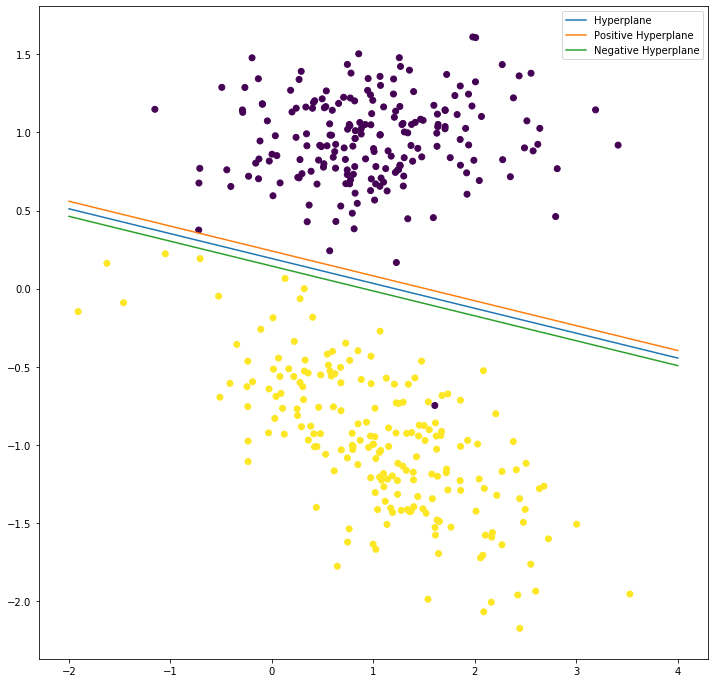

In [22]:
plotHyperPlane(W[0][0],W[0][1],b)

So , what svm tried to do is, it basically placed all the points in correct hyperplane, but at the cost of reduced margin . so the margin has been reduced because the penality of misclassifying any point or the penality of adding any point beyond the margin is very high. so our algorithm tries to minimise loss but at the cost of reduced margin. In order to find the optimim value of c , we will read something called grid search, you camn try for different value of c and you can find optimum parameter for your example.The points which are lying directly on hyperplane , are called support vectors.if different class point is in different hyperplane, it causes a very high penality.

# Handling Non Linearity Seperable data

In [23]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [24]:
X,Y=make_circles(n_samples=500,noise=0.02)
print(X.shape,Y.shape)

(500, 2) (500,)


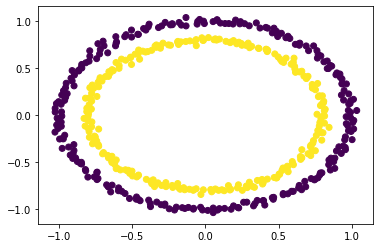

In [25]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

Now we have  to project this data into higher dimensions

X[x1,x2]-->fi(X)[x1,x2,x3], x3=x1*x1+x2*x2 [ for all examples]

In [26]:
def phi(X):
    # we will apply non linear transformation
    X_=np.zeros((X.shape[0],3))
    X1=X[:,0]
    X2=X[:,1]
    X_[:,0]=X1
    X_[:,1]=X2
    X3=X1**2+X2**2
    X_[:,2]=X3
    return X_

In [27]:
X_=phi(X)

In [28]:
print(X[:3,:])

[[-0.63877379 -0.50342524]
 [ 0.28303187 -0.92592062]
 [-0.18928426 -0.72730738]]


In [29]:
print(X_[:3,:])

[[-0.63877379 -0.50342524  0.66146893]
 [ 0.28303187 -0.92592062  0.93743603]
 [-0.18928426 -0.72730738  0.56480455]]


In [30]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,10))
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    ax=fig.add_subplot(111,projection='3d')
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    if show==True:
        plt.show()
    return ax

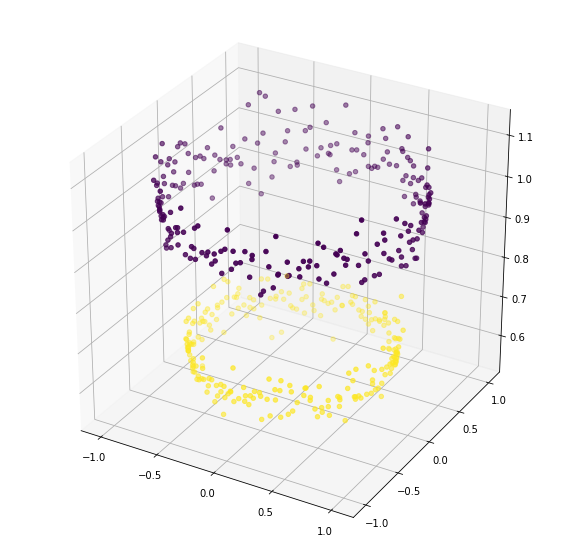

In [31]:
ax=plot3d(X_)

# Applying Logistic Regression on Both the data

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [33]:
lr=LogisticRegression(solver='lbfgs')
#cv=cross_val_score()

In [34]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy(2d) is %.4f"%(acc*100)) #  not a good classifier

Accuracy(2d) is 44.8000


# Logistic Regression On Higher Dimension Space

In [35]:
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy(3d) is %.4f"%(acc*100)) # good classifier

Accuracy(3d) is 100.0000


# Visualise the decision Surface

In [36]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
wts=lr.coef_
print(wts)

[[ 1.04976794e-02 -2.87497560e-02 -1.08890048e+01]]


In [38]:
bias=lr.intercept_
print(bias)

[8.93669595]


In [39]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))

In [40]:
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [41]:
z=-(wts[0,0]*xx+wts[0,1]*yy+bias)/wts[0,2]

In [42]:
print(z)

[[0.82406063 0.82502469 0.82598875 0.82695281]
 [0.82142037 0.82238443 0.8233485  0.82431256]
 [0.81878012 0.81974418 0.82070824 0.8216723 ]
 [0.81613986 0.81710392 0.81806798 0.81903205]]


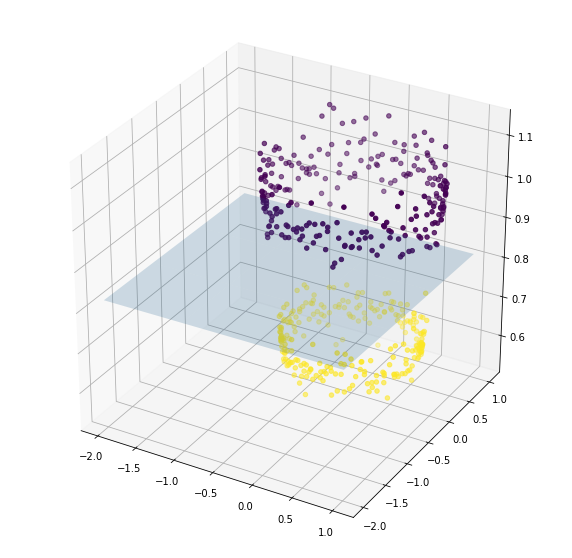

In [43]:
ax=plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

# Kernel based Classification in SVM

SKlearn supports the following types of kernels , Which can be used in many real life problems .
Linear Kernel, RBF kernel, Polynomial Kernel, Sigmoid Kernel.
Kernel Trick is a method of using a linear classifier to solve a non linear problem . It transforms the linearly inseperable data into seperable one.

- Kernel is basically a function which accepts two vectors or two examples the internally expresses those vectors in the form of a dot product or some mathematical formula, that is efficient to compute.


In [44]:
from sklearn import svm

In [49]:
svc=svm.SVC() # SVC=> Support Vector Classifier

SVM supports three types of svm : 1) Linear SVM 2) NuSVC 3) LinearSVC

- Nusvc is particularly used if you want to reduce the number of support vectors.
- svc and Nusvc are similar methods but accept slightly different set of parameters and have differnt mathematical formulations. 
- On the other hand, Linearsvc is another implementaion of Support vector classification for the case of linear kernel. 
- Note that LinearSvc doesnt accept keyword kernel, as this is assumed to be linear . It also lacks some of the members of svc and Nsvc like support vectors.

In [51]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
svc.score(X,Y) # by default the kernel used is rbf, which is giving 100% accuracy.

1.0

# Linear Kernel SVM

In [56]:
svc=svm.SVC(kernel='linear')
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
svc.score(X,Y)

0.506

# Polynomial Kernel SVM

In [60]:
svc=svm.SVC(kernel='poly')
svc.fit(X,Y)
svc.score(X,Y)

0.566

# Custom Kernel

In [66]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [67]:
svc=svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0

# Finding The Right Hyperparameters

# Grid Search for best Hyperparameters
-  we have seen there are lot of parameters in svm and another models like penality, kernels, what should be the best value of penality and kernels. first method is hit and trial on various models .
- another method is use grid search on all parameters from you want to select.

# MNIST Classification

In [90]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [125]:
params=[
    {
        'kernel':['linear','rbf','poly','sigmoid'],
        'C' : [0.1,0.2,0.5,1.0,2.0,5.0]
    }
]

# Dataset Prepare

In [72]:
data=load_digits()

In [73]:
X=data.data
Y=data.target

In [74]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [81]:
lr=LogisticRegression()
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
cross_val_score(lr,X,Y,scoring="accuracy",cv=5).mean()

0.9210188113360701

# So Logistic Regression gives around 92% accuracy

# Lets check on Support Vector Classifier

In [84]:
svc=svm.SVC()
svc.fit(X,Y)
cross_val_score(svc,X,Y,scoring="accuracy",cv=5).mean()

0.44878680061604637

# Pretty Bad result :(

In [85]:
# Reason : We are not using right set of parameters. 

### Right Set Of parameters

In [87]:
import multiprocessing # it will basically tell you that how many cpu are available.

In [88]:
cpus=multiprocessing.cpu_count()
print(cpus)

4


In [126]:
from sklearn import svm
gs=GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring='accuracy',cv=5,n_jobs=cpus)

In [128]:
from warnings import simplefilter
simplefilter(action='ignore', category= DeprecationWarning)
gs.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [129]:
gs.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [130]:
gs.best_score_

0.9699499165275459

# SVM with Polynomial Kernel, C=0.1 gives 97% accuracy on the Dataset!